In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sitka.general.settings import *
from sitka.io.time import *
from sitka.io.weather import *
from sitka.calculations.solar import *
from sitka.components.site import *
from sitka.components.surface import *

In [3]:
dir_path = os.getcwd()
weather_file = os.path.join(dir_path, 'USA_WA_Seattle-Boeing.Field.727935_TMY3.epw')

In [4]:
start_hour = 0
end_hour = 8760
time_steps_per_hour = 4

In [5]:
# Simulation run parameters
settings = Settings(dir_path)

time = Time(start_hour=start_hour, end_hour=end_hour, time_steps_per_hour=time_steps_per_hour)

weather = EPW(time, weather_file)
print(weather.location)

# Setup site
site = Site(weather.latitude, weather.longitude, weather.elevation)
print(site.latitude)
print(site.longitude)

# Solar angles
solar_angles = SolarAngles(time, site)

Updating time object
Importing weather data.
file imported.
Resampling weather data.
Seattle Boeing Field  Isis
47.68
-122.25
Updating solar angles


# Radiation

Updating surface solar calculations.
Updating external shortwave radiation calculations.
Updating surface solar calculations.
Updating external shortwave radiation calculations.
Updating surface solar calculations.
Updating external shortwave radiation calculations.
Updating surface solar calculations.
Updating external shortwave radiation calculations.


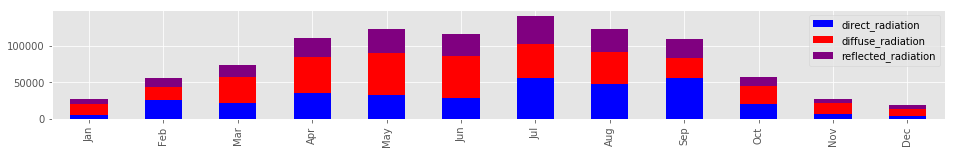

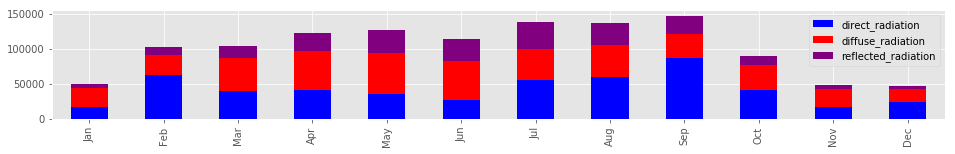

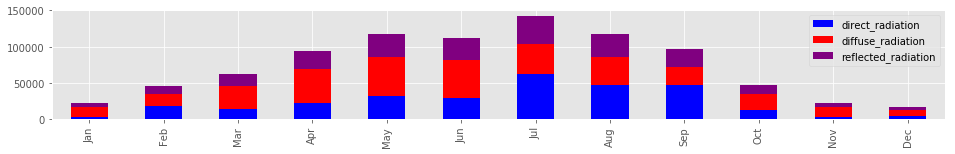

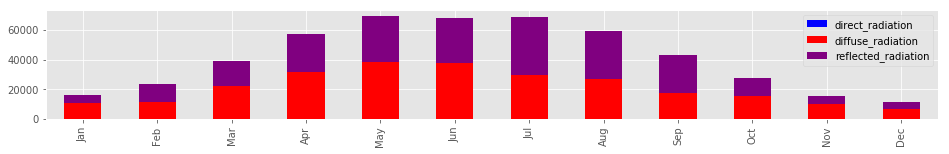

In [7]:
for azimuth in [-90, 0, 90, 180]:

    surface1 = Surface('surface', azimuth=azimuth, tilt=90, width=0)
    ht_surface1 = HeatTransferSurface('ht_surface1', time, solar_angles, weather, surface1)
    
    # Calculate the monthly incident radiation totals
    monthly_hours = pd.DataFrame({
            'direct_radiation': ht_surface1.external_shortwave_radiation.get_time_series('incident_direct_radiation').resample('1M').sum(),    
            'diffuse_radiation': ht_surface1.external_shortwave_radiation.get_time_series('incident_diffuse_radiation').resample('1M').sum(),    
            'reflected_radiation': ht_surface1.external_shortwave_radiation.get_time_series('incident_reflected_radiation').resample('1M').sum(),  
    })

    monthly_hours.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax = monthly_hours.plot(legend=True, kind='bar', stacked=True, color=['blue', 'red', 'purple', 'green'], figsize=(16, 2))
    
    #ax.yaxis = 200000